In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast

In [2]:
orders = pd.read_csv(r"D:\IT Courses\Data Analysis Courses\Data Analysis Projects\International Sales Company Project\International_Sales_Database\Python_Analysis\2_Data_Exploration_Univariate_Analysis\Orders_Dataframe.csv")

orders["orderdate"] = pd.to_datetime(orders["orderdate"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   827 non-null    int64         
 1   firstname    827 non-null    object        
 2   lastname     827 non-null    object        
 3   city         827 non-null    object        
 4   country      827 non-null    object        
 5   orderid      827 non-null    int64         
 6   ordernumber  827 non-null    int64         
 7   orderdate    827 non-null    datetime64[ns]
 8   totalamount  827 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 58.3+ KB


**(1) Relation Between Customer Full Name & Sum of Total Amount:**

In [3]:
orders["fullname"] = orders["firstname"] + " " + orders["lastname"]

In [10]:
customer_group = (((orders.groupby(by=["fullname"])["totalamount"].sum()).reset_index()).sort_values(by=["totalamount"], ascending=False)).head(10)
customer_group

,fullname,totalamount
78,Roland Mendel,113236.68
33,Horst Kloss,100233.39
42,Jose Pavarotti,99351.49
66,Patricia McKenna,57317.39
70,Paula Wilson,52245.90
54,Maria Larsson,32555.55
39,Jean Fresnière,32203.90
73,Philip Cramer,31745.75
47,L?cia Carvalho,30226.10
46,Karl Jablonski,29073.45


***Bar Chart:***

**1- Using Matplotlib Library:**

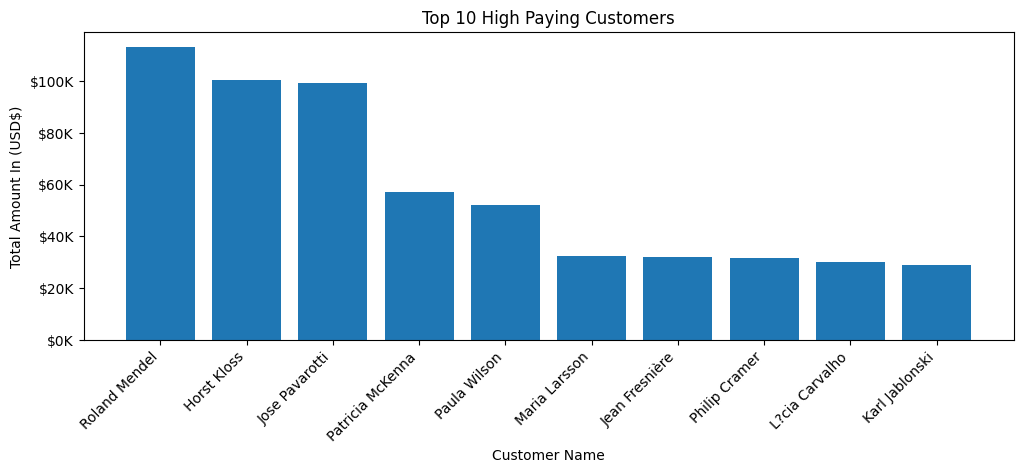

In [15]:
plt.figure(figsize=(12,4))
plt.bar(customer_group["fullname"], customer_group["totalamount"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 High Paying Customers")
plt.xlabel("Customer Name")
plt.ylabel("Total Amount In (USD$)")

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, position: (f"${int(y / 1000)}K")))

**2- Using Plotly Library:**

In [46]:
px_bar = px.bar(data_frame=customer_group,
       x="fullname",
       y="totalamount",
       text_auto=True,
       title="Top 10 High Paying Customers",
       labels={
           "fullname" : "Customer Name",
           "totalamount" : "Total Amount"
       },
       )

px_bar.update_traces(
    marker_color="rgb(255,73,0)",
    marker_line_color="rgb(255,73,0)",
    marker_line_width=1.5,
    textposition="inside",
    opacity=0.7
)


***Horizontal Bar Chart Using Matplolib Library:***

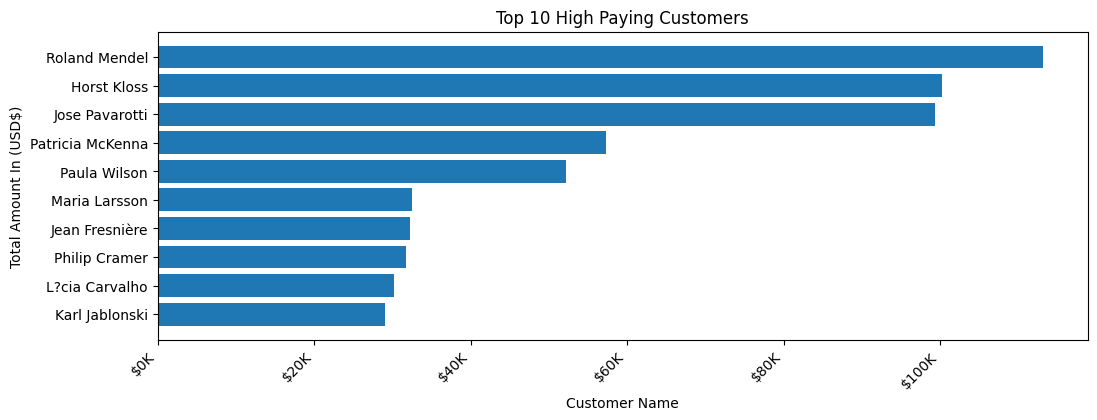

In [53]:
plt.figure(figsize=(12,4))
plt.barh(y=customer_group["fullname"], width=customer_group["totalamount"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 High Paying Customers")
plt.xlabel("Customer Name")
plt.ylabel("Total Amount In (USD$)")

ax = plt.gca()
ax.invert_yaxis()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f"${int(x / 1000)}K")))

**(2) Relation Between Customer Full Name & Count of Invoices:**

In [55]:
customer_count = ((orders["fullname"].value_counts()).sort_values(ascending=False)).head(10)
customer_count

fullname
Roland Mendel         30
Jose Pavarotti        30
Horst Kloss           27
Maria Larsson         19
Patricia McKenna      19
Carlos Hern?ndez      18
Christina Berglund    18
Paula Wilson          18
Laurence Lebihan      17
Pirkko Koskitalo      15
Name: count, dtype: int64

**Bar Chart**

**1- Using Matplotlib Library:**

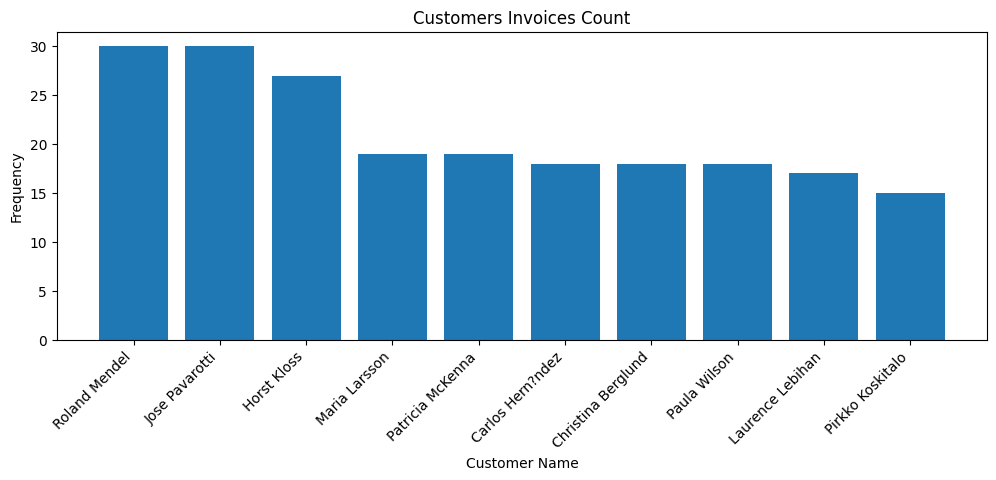

In [58]:
plt.figure(figsize=(12,4))
plt.bar(customer_count.index, customer_count.values)
plt.xticks(rotation=45, ha="right")
plt.title("Customers Invoices Count")
plt.xlabel("Customer Name")
plt.ylabel("Frequency")

ax = plt.gca()

**2- Using Plotly Library:**

In [63]:
px_bar = px.bar(data_frame=customer_count,
       x=customer_count.index,
       y=customer_count.values,
       text_auto=True,
       title="Customers Invoices Count",
       )

px_bar.update_traces(
    marker_color="rgb(255,73,0)",
    marker_line_color="rgb(255,73,0)",
    marker_line_width=1.5,
    textposition="inside",
    opacity=0.7
)


***Horizontal Bar Chart Using Matplolib Library:***

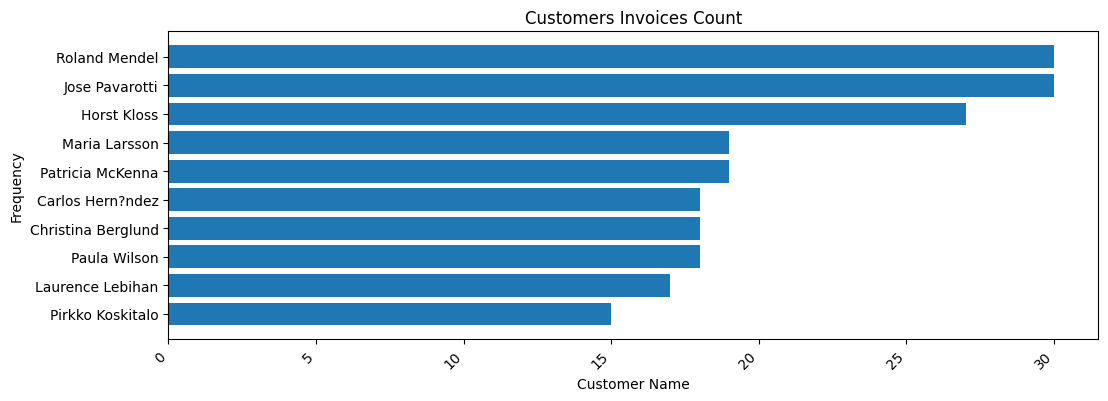

In [66]:
plt.figure(figsize=(12,4))
plt.barh(y=customer_count.index, width=customer_count.values)
plt.xticks(rotation=45, ha="right")
plt.title("Customers Invoices Count")
plt.xlabel("Customer Name")
plt.ylabel("Frequency")

ax = plt.gca()
ax.invert_yaxis()